In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="darkgrid")

def coin_toss_simulation(num_tosses=100, biased_prob=0.7):
    fair_heads, biased_heads = 0, 0
    fair_results, biased_results = [], []

    for i in range(1, num_tosses + 1):
        fair_toss = np.random.choice(["H", "T"])
        biased_toss = "H" if np.random.rand() < biased_prob else "T"

        fair_heads += (fair_toss == "H")
        biased_heads += (biased_toss == "H")

        fair_results.append(fair_heads / i)
        biased_results.append(biased_heads / i)

    # Convert results to DataFrame for Seaborn
    df = pd.DataFrame({
        "Toss Number": np.arange(1, num_tosses + 1),
        "Fair Coin (50%)": fair_results,
        "Biased Coin (70%)": biased_results
    })

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df, x="Toss Number", y="Fair Coin (50%)", label="Fair Coin", linewidth=2)
    sns.lineplot(data=df, x="Toss Number", y="Biased Coin (70%)", label="Biased Coin", linewidth=2)
    plt.axhline(0.5, linestyle="dashed", color="blue", alpha=0.7)
    plt.axhline(biased_prob, linestyle="dashed", color="green", alpha=0.7)
    plt.title("Evolution of Probability in Coin Tosses")
    plt.ylabel("Empirical Probability of Heads")
    plt.xlabel("Number of Tosses")
    plt.legend()
    plt.show()


def dice_roll_simulation(num_rolls=1000):
    weighted_prob = [0.05, 0.1, 0.15, 0.2, 0.25, 0.25]
    fair_counts = np.zeros(6)
    weighted_counts = np.zeros(6)

    for _ in range(num_rolls):
        fair_roll = np.random.randint(1, 7)
        weighted_roll = np.random.choice([1, 2, 3, 4, 5, 6], p=weighted_prob)

        fair_counts[fair_roll - 1] += 1
        weighted_counts[weighted_roll - 1] += 1

    # Convert to probability
    fair_probs = fair_counts / num_rolls
    weighted_probs = weighted_counts / num_rolls

    df = pd.DataFrame({
        "Face": np.arange(1, 7),
        "Fair Dice (1/6)": fair_probs,
        "Weighted Dice": weighted_probs
    })

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df.melt(id_vars=["Face"], var_name="Dice Type", value_name="Probability"),
                x="Face", y="Probability", hue="Dice Type", palette=["blue", "green"])
    plt.title("Comparison of Fair and Weighted Dice Rolls")
    plt.ylabel("Probability of Rolling Each Face")
    plt.xlabel("Dice Face")
    plt.show()





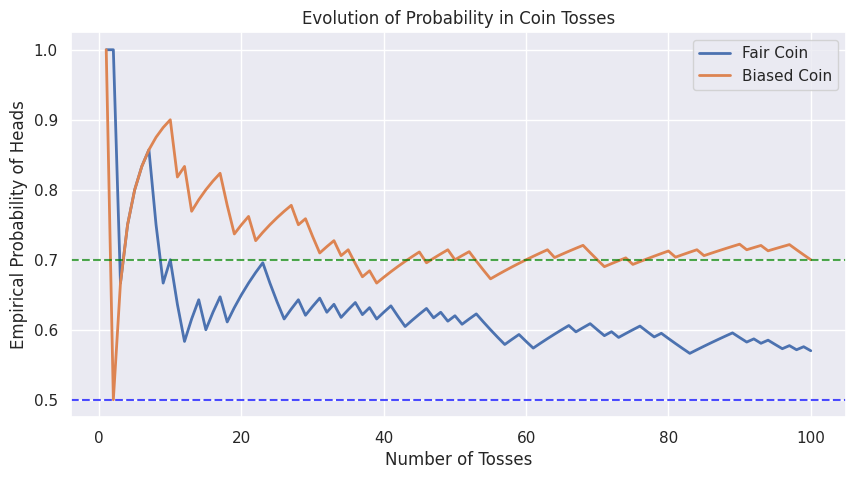

In [3]:
# Run Simulations
coin_toss_simulation()

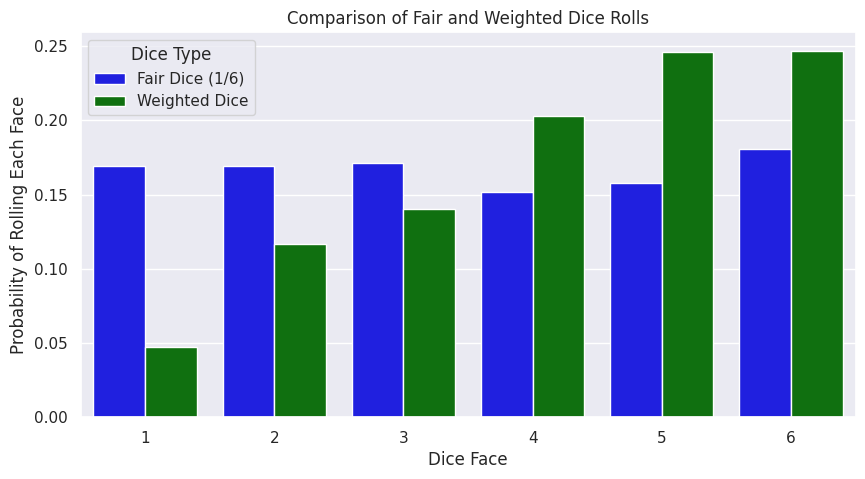

In [4]:
# Run Simulations
dice_roll_simulation()